In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Link => https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

df = pd.read_csv("spotify_millsongdata.csv")

In [3]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.tail(5)

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [5]:
df.shape

(57650, 4)

In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
df =df.sample(5000).drop('link', axis=1).reset_index(drop=True)

In [8]:
df.head(10)

,artist,song,text
0,Cher,Angels Running,Well I heard enough \r\nAnd I've seen enough ...
1,Leann Rimes,Written In The Stars,I am here to tell you we can never meet again ...
2,Guns N' Roses,Coma,See you've caught me in a coma \r\nAnd I don'...
3,Donna Summer,Theme To Dream A Lot ( I Will Live For Love),Theme to Dream a Lot (I will live for love) By...
4,LL Cool J,Jealous,Yeah you know what I'm saying? \r\nIt's real ...
5,Bette Midler,Whose Side Are You On?,Every time I touch you \r\nMy heart skips a b...
6,Jimi Hendrix,You've Got Me Floating,"Well, you've got me floatin' around and 'round..."
7,Human League,I Need Your Loving,"I need your loving \r\nI need your kissing, b..."
8,Bob Dylan,Dear Landlord,"Dear landlord, \r\nPlease don't put a price o..."
9,O.A.R.,Peace,I don't wanna fight no more \r\nOnly wanna ge...


In [9]:
df['text'][0]

"Well I heard enough  \r\nAnd I've seen enough  \r\nAnd I know enough to know  \r\nI know a good thing when I see it  \r\nAnd it's a bad thing to let go  \r\n  \r\nWell I've been around  \r\nI've been up and down  \r\nUntil I bailed out of control  \r\nWith your world all in motion  \r\nGonna put a ball  \r\nAnd chain on your soul  \r\n  \r\nAll those angels running  \r\nPicking up the pieces  \r\nPutting hearts together  \r\nBroke long ago  \r\nI know a good thing when I see it  \r\nAnd it's a bad thing to let go  \r\n  \r\nWe'll always be lovers  \r\nWith borders of there own  \r\nAnd you may charge across  \r\nIn a golden chariot  \r\nBut you will never be at home  \r\n  \r\n'Cause I had dreams  \r\nLike distant thunder  \r\nI had hope like a prayer unheard  \r\nThis nothing less than perfect  \r\nIn a less than perfect world  \r\n  \r\nAll those angles running  \r\nPicking up the pieces  \r\nPutting back together  \r\nHearts broke long ago  \r\nI know a good thing when I see it  \r

In [27]:
# df = df.sample(5000)

In [10]:
df.shape

(5000, 3)

Text Cleaning/ Text Preprocessing

In [11]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [12]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [15]:
# computes the cosine similarity between the vectors,
# ..essential for the recommendation system to identify similar songs.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [17]:
similarity[0]

array([1.        , 0.08299409, 0.10164374, ..., 0.02230856, 0.02104194,
       0.03599887])

In [19]:
df[df['song'] == 'Jealous']

,artist,song,text
4,LL Cool J,Jealous,yeah you know what i 'm say ? it 's real funni...


In [20]:
# def recommendation(song_df):
#     idx = df[df['song'] == song_df].index[0]
#     distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
    
#     songs = []
#     for m_id in distances[1:21]:
#         songs.append(df.iloc[m_id[0]].song)
        
#     return songs

def recommendation(song_df):
    filtered_df = df[df['song'] == song_df]
    if not filtered_df.empty:
        idx = filtered_df.index[0]
        distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])

        songs = []
        for i in distances[1:6]:  # Assuming you want the top 5 recommendations
            song_id = i[0]
            songs.append(df['song'][song_id])
        return songs
    else:
        return "No recommendations found. Please check the song title."


In [21]:
recommendation('Jealous')

['Jealousy', 'Jealousy', "Losin' You", 'Red Line', 'I Wanna Be']

In [22]:
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

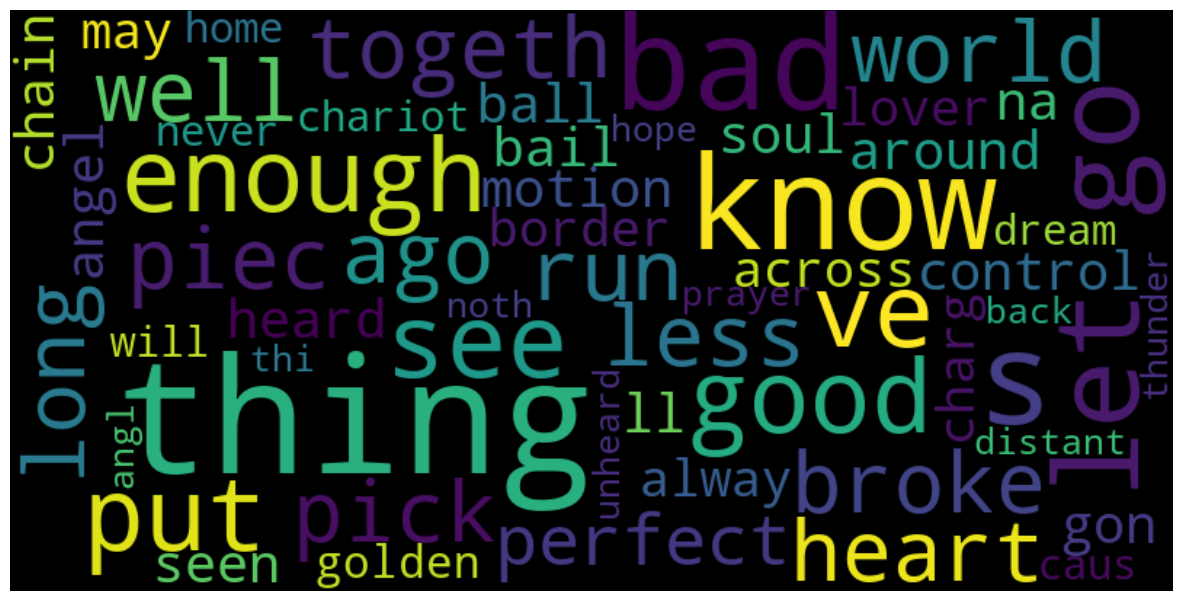

In [23]:
from wordcloud import WordCloud

# Generate a word cloud for the first song
first_song_text = df.loc[0, 'text']  # Adjust index as needed
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110).generate(first_song_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

# Flatten the similarity matrix and filter out self-similarities (which are always 1)
flat_similarity = similarity[np.triu_indices_from(similarity, k=1)]

plt.figure(figsize=(10, 6))
sns.histplot(flat_similarity, bins=30, kde=True)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

